In this lab, we are going to focus on text clustering. 

Let's load the dataset in the same way as we loaded in the previous lab. The dataset is also the same: movie reivew dataset.


In [1]:
from sklearn.datasets import load_files
# Read training files
reviewsTrain = load_files("aclImdb/train/")
# Lets get training reviews and training labels in sepearate lists
textTrain, yTrain = reviewsTrain.data, reviewsTrain.target

# Let's understand the two lists: reviews (text_train) and their labels (y_train)
print("Type of text_train: ",type(textTrain))
print("Text train at[6]:\n ", textTrain[6])


Type of text_train:  <class 'list'>
Text train at[6]:
  b'I thought this was a very clunky, uninvolving version of a famous Australian story. Heath Ledger and Orlando Bloom were very good in their roles, and gave their characters some personality; but the whole thing felt forced and mechanical.<br /><br />The beginning could have been a lot more involving; perhaps starting with a shootout, and then flashing back for a recap of how they got there or that sort of thing. And I felt like every scene was routinely predictable and signposted, like a very bad tv soap.<br /><br />I was really looking forward to this movie, and hoping for something a lot better. The only thing I can say in its favour is that it beats the Mick Jagger version, but not by much.'


Identify the list of stop words.

In [2]:
import string
stopWords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
           'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
           'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
           "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
           'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
           'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am',
           'is', 'are', 'was', 'were', 'be', 'been', 'being','have', 'has', 
           'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
           'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
           'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
           'through', 'during', 'before', 'after', 'above', 'below', 'to', 
           'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 
           'again', 'further', 'then', 'once', 'here', 'there', 'when', 
           'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
           'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
           'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will','would'
           ,'just','br',"''", "'s", '...', '``','--']

# Add punctuations too to the list
stopWords+=list(string.punctuation)

print (stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Let's tokenize and stem the code

In [3]:
import nltk
from nltk.stem import PorterStemmer

# Initialize stemmer'
stemmer = PorterStemmer()

# Create function for tokenization and stemming
def tokenizeAndStem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    stems = [stemmer.stem(t) for t in tokens]
    return stems
print (".......")
#print("Type of stems: ",type(stems))

.......


Now, we shall create a Tfidf (Term Frequency Inverse Document Frequency) matrix from the text corpus. For further details of Tfidf, see lecture notes. In addition to unigram tokens , we are also calculating bigrams and trigrams.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#To find out more about the parameters of TfidfVectorizer, type help(TfidifVectorizer)
#max_df and min_df are used to filter out the words which are in more than 95% and less than 5% 
# reviews. The code is similar to CountVectorizer tha we used in the last lab.
tfidfVectorizer = TfidfVectorizer(max_df=0.95, max_features=2000000,
                                 min_df=0.05, stop_words=stopWords,
                                 use_idf=True, tokenizer=tokenizeAndStem
                        , ngram_range=(1,3))

tfidfMatrix = tfidfVectorizer.fit_transform(textTrain)

print(tfidfMatrix.shape)


(2002, 396)



Let's print the terms in the  Tfidf matrix

In [10]:
terms = tfidfVectorizer.get_feature_names()
print (terms)
print(len(terms))
print(tfidfMatrix[0])

["'d", "'ll", "'m", "'re", "'ve", "'ve seen", '10', '2', 'absolut', 'act', 'action', 'actor', 'actress', 'actual', 'age', 'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'american', 'ani', 'anoth', 'anyon', 'anyth', 'appear', 'around', 'ask', 'attempt', 'audienc', 'aw', 'away', 'back', 'bad', 'basic', 'beauti', 'becaus', 'becom', 'befor', 'begin', 'believ', 'best', 'better', 'big', 'bit', 'black', 'book', 'bore', 'boy', 'bring', 'budget', 'ca', "ca n't", 'call', 'came', 'camera', 'care', 'case', 'cast', 'chang', 'charact', 'cinema', 'classic', 'close', 'come', 'comedi', 'comment', 'complet', 'consid', 'could', "could n't", 'coupl', 'cours', 'creat', 'dark', 'day', 'death', 'decid', 'definit', 'deserv', 'develop', 'die', 'differ', 'direct', 'director', 'disappoint', 'doe', "doe n't", 'done', 'drama', 'dure', 'dvd', 'earli', 'effect', 'either', 'els', 'emot', 'end', 'enjoy', 'enough', 'entertain', 'entir', 'episod', 'especi', 'even', 'ever', 'everi', 'everyon', 'everyt

Let's determine the best number of clusters, intrinsically, by using the knee (or elbow) method (see lecture notes). However, note that, this is just an approximation to determine the best number of clusters. Final answer is discovered by manual investigation or by using the ground truth based evaluation.

Note in the following code, we are finding the cluster for each k only once but ideally we should repeat this process for each K multiple times with different random initial values. For simplicity, I kept it to only one run per k.

This will take some time to execute.....
k...  2
k...  3
k...  4
k...  5
k...  6
k...  7
k...  8
k...  9
k...  10
[1668.948470226576, 1648.724730207433, 1635.0745291996782, 1624.1640482180426, 1613.8603184858723, 1606.750584137771, 1602.2148972407192, 1597.0056622316108, 1590.9103450234313]


Text(0.5,1,'Knee/Elbow curve')

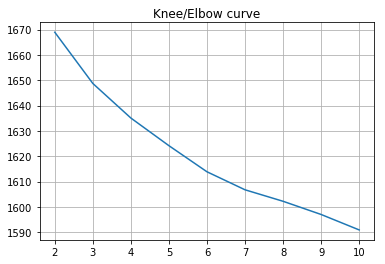

In [15]:
# Here we are using matplotlib library to plot the residual 
# sum of squared error for different number of clusters
%matplotlib inline
from sklearn.cluster import KMeans
#Pyplot module in matplotlib contains functions to quickly plot charts
from matplotlib import pyplot 
import numpy as np

print("This will take some time to execute.....")
# Residual sum of squared distances of samples for each clsuter
kRSS= []
xAxisVals=[]
kmeans=[] # we shall keep track of the clustering

for k in range(2, 11):
    print ("k... ",k)
    xAxisVals.append(k)
    
    rd=np.random.RandomState()
    # Let's initialize k means with the k clusters
    kmeans.append( KMeans(n_clusters=k,random_state=rd) )
    # Create clusters using the tfidf matrix
    kmeans[k-2].fit(tfidfMatrix)
    # kmeans.inertia_ returns the sum of squared distances of
    # records to their cluster's centroids
    # we will kepp the minimum of 
    kRSS.append(kmeans[k-2].inertia_)

print (kRSS)

pyplot.plot(xAxisVals, kRSS)
pyplot.grid(True)
pyplot.title('Knee/Elbow curve')

The knee seems to be at 3 and then there are not too obvious knees at other points such as 7. We should use 3. 
However, I am  just going to select two clsuters, just to compare with the two types of classes for the reviews (positive or negative). Also the elbow is not bending sharply.

In [18]:

numClusters = 2
km = kmeans[numClusters-2]

clusters = km.labels_.tolist()

print ("Clustering complete.....")


Clustering complete.....


Now, we shall look at the top few terms in each cluster. We find top few terms by sorting the features (terms) of each centroid by their tfidf value. We shall then print them using terms  extracted above (terms = tfidfVectorizer.get_feature_names())

In [19]:

print("Top 10 terms per cluster:\n")

#Following line of code first extract the cluster centers, then sort 
# their terms by the tfidif values, and then return the index of sorted 
# values. The [:,::-1] at the end reverse sort them or sort in descending order
sortedCentroidFeatures = km.cluster_centers_.argsort()[:,::-1] 

for i in range(numClusters):
    print("Cluster %d words: \n" % i)
    for ind in sortedCentroidFeatures[i, :10]:
        print (terms[ind], " ", km.cluster_centers_[i,ind])
        
    print("\n\n")
    

Top 10 terms per cluster:

Cluster 0 words: 

film   0.12494049176593973
thi   0.10037737316750092
wa   0.08291231022018603
hi   0.07939149791791732
one   0.05748903725366964
n't   0.05668087582029418
thi film   0.04664931342489743
ha   0.04550941493803768
like   0.04439783481363678
stori   0.041556073680804224



Cluster 1 words: 

movi   0.2256562856879416
thi   0.14342346387838834
thi movi   0.11886540727000165
wa   0.11601280049106073
n't   0.0764523954500653
like   0.05626965876929733
watch   0.055532067033624545
one   0.05254242796912477
good   0.04671523912915767
veri   0.041212806464556245





Let's see first 20 records went to which clusters.

In [20]:
#Go through all clusters (numbers)
for k in range(0,numClusters):
    print ("*********Cluster ", k,"******************************")
    # for first 20 recrds
    for idx in range(0,20):
        # if cluster label of the ith record is the same as 
        # the cluster number k
        if (k==clusters[idx]):
            # then print only first 100 characters
            print (str(textTrain[idx])[:100],"....")
    
    

*********Cluster  0 ******************************
b'The real star of this ridiculous story is glorious technicolor. A visual treat to the eye, the fil ....
b"This show is a great history story. It's has everything from slavery,the way they were treated, re ....
b"Outlandish premise that rates low on plausibility and unfortunately also struggles feebly to raise ....
b"Without doubt Beat Street is the best film about the breakin scene. Everything about it is spot on ....
b'Here\'s an interesting little movie that strictly gives the phrase "low budget" a horrible name. O ....
b'This interesting Giallo boosts a typical but still thrilling plot and a really sadistic killer tha ....
b"Steven Speilberg's adaptation of Alice Walkers popular novel is not without its share of controver ....
b'The silent one-panel cartoon Henry comes to Fleischer Studios, billed as "The world\'s funniest hu ....
b"The night of the prom: the most important night to any shallow girl composed almost entirely of pl 

If you read closely above, you shall see most of the reviews in first cluster are positive and most of them in second are negative. However, clusters are not pure, there are some reviews from other types too. This is mostly the case with clustering.

Attempt anyone of the following exercise for submission. However, for your practice, I recommend trying both. These exercises may have different diffculty levels.

# Exercise 6.1 

Can you determine what is the purity of clusters? See lecture notes on how to determine the purity. Hint: *yTrain* variable extracted in the beginning contains the true label of the reviews that you can use in your calcualtions of purity.

In [63]:
# To determine the purity of clusters we need the original labels from each document
# and calculate the max number of documents from a single class in each cluster

classes = [0,1]
purities = []
num_docs = len(textTrain)
ndocs_in_clust = 0
max_ok_docs_in_clust = 0

#print(clusters)
# go through all classes
for c in classes:
    print("Class ",c)
    for clust in range(0, numClusters):
        for idx in range(0,num_docs):
            if (clusters[idx] == clust and c == yTrain[idx]):
                ndocs_in_clust += 1
        print(ndocs_in_clust, "documents in cluster", clust, "are from class", c)
        if(ndocs_in_clust > max_ok_docs_in_clust):
            max_ok_docs_in_clust = ndocs_in_clust
            
        ndocs_in_clust = 0
    
    print("Max number of correctly classified docs in class",c,":",max_ok_docs_in_clust)
    purities.append(max_ok_docs_in_clust)
    max_ok_docs_in_clust = 0

purity = (1/num_docs) * sum(purities)

print("Purity:",purity)


Class  0
620 documents in cluster 0 are from class 0
381 documents in cluster 1 are from class 0
Max number of correctly classified docs in class 0 : 620
Class  1
713 documents in cluster 0 are from class 1
288 documents in cluster 1 are from class 1
Max number of correctly classified docs in class 1 : 713
Purity: 0.6658341658341659


# Exercise 6.2

Apply Bernoulli mixture model of clustering on the data used in this lab. Show the cluster association of first 20 reivews as shown in this lab. 

Note:
Scikit-learn does not have Bernoulli mixture model for clusering but there are some implementations available on Github: https://github.com/manfredzab/bernoulli-mixture-models 
https://github.com/schwannden/MNIST_mixture-of-bernoulli

You can either use any open implementation avialble on Github (or elsewhere in Python) or you can implement your own which can be easily implemented by following the example in lecture notes.

Scikit-learn has an implementation of Gaussian Mixture models of clustering. If you find Bernoulli difficult to implement, then  try using Gaussian Mixture models avialble in Scikit-learn for this exercise:
http://scikit-learn.org/stable/modules/mixture.html#mixture